# Object Detection

In [50]:
import numpy as np
import cv2 #pip install opencv-python
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)
# or cv2.dnn.readNetFromTensorflow

In [51]:
classlabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')
    #classlabels.append(fpt.read())
# Giving random colors to each class
COLORS = np.random.uniform(0, 255, size=(len(classlabels), 3))

In [52]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'horse', 'bird', 'cat', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True) ## convert auto to RGB

<dnn_Model 000001E4EDC35E50>

# read an image

In [176]:
img = cv2.imread('car_dog_person.jpg')

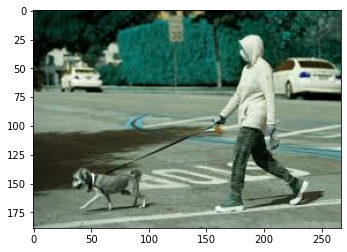

In [168]:
plt.imshow(img) ## bgr

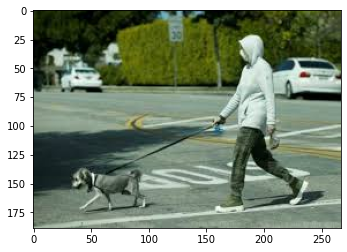

In [169]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [177]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [178]:
print(ClassIndex)

[[ 1]
 [18]
 [ 3]
 [ 3]]


In [179]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame,(x, y), (x+w, y+h), (255, 0, 0), 2)
    #putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img,boxes,(255,0, 0), 2) 
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255,0), thickness=3)

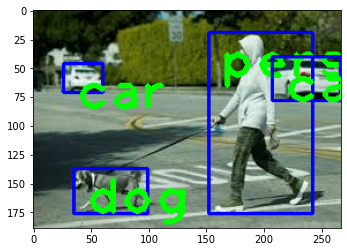

In [180]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [145]:
print(confidence)

[[0.7914246]
 [0.6983744]
 [0.6748949]
 [0.6188987]]


In [136]:
print("[INFO] {}".format("{}: {:.2f}%".format(classlabels[0], conf * 100)))

[INFO] person: 79.14%


In [134]:
# Object detection function
def object_detection(img):
#     size of image
    (h, w) = img.shape[:2]
    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    # loop over the detections
    for i in np.arange(0, confidence.shape[0]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        conf = confidence[i]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if conf > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(confidence[i])
            box = bbox
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(classlabels[i], conf * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(img, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(img, label, (startX, y),
                        cv2.FONT_HERSHEY_PLAIN, 0.5, COLORS[idx], 2)
    return img

# Video Demo

In [ ]:
cap = cv2.VideoCapture("london-westminsterbridge3.mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0, 0), 2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255,0), thickness=3)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllwindows()

[[ 1]
 [ 3]
 [ 6]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [ 6]
 [85]
 [ 1]
 [ 1]
 [85]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [ 6]
 [85]
 [ 1]
 [ 1]
 [85]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [85]
 [ 6]
 [ 1]
 [85]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [ 6]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 3]
 [85]
 [ 6]
 [ 1]
 [85]
 [ 1]
 [ 1]
 [ 3]
 [ 1]]
[[85]
 [85]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 6]]
[[ 1]
 [85]
 [85]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 6]
 [ 1]]
[[ 1]
 [85]
 [ 3]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 6]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [85]
 [ 3]
 [85]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [85]
 [85]
 [ 1]
 [ 8]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 3]
 [85]
 [85]
 [ 1]
 [ 1]]
[[ 1]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 8]
 [ 3]]
[[ 1]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 3]
 [ 8]
 [ 1]
 [ 3]]
[[ 1]
 [85]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 8]
 [ 3]
 [ 1]]
[[85]
 [ 1]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [ 3]
 [ 3]
 [ 1]]
[[ 1]
 [85]
 [85]
 [ 1]
 [ 1]

# Webcam

In [ ]:
cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0, 0), 2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255,0), thickness=3)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllwindows()